# Problem 1: Clustering
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data and do exploratory data analysis. Describe the data briefly.

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Dataset for Problem 1: bank_marketing_part1_Data.csv
Data Dictionary for Market Segmentation:
1.	spending: Amount spent by the customer per month (in 1000s)
2.	advance_payments: Amount paid by the customer in advance by cash (in 100s)
3.	probability_of_full_payment: Probability of payment done in full by the customer to the bank
4.	current_balance: Balance amount left in the account to make purchases (in 1000s)
5.	credit_limit: Limit of the amount in credit card (10000s)
6.	min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7.	max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


# Import Libraries

In [941]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [942]:
#Preprocession
from sklearn.preprocessing import StandardScaler

#Hirarchical clustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score,silhouette_samples

#Non Hierarchical clustering
from sklearn.cluster import KMeans

In [943]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

# Loading the data

In [944]:
df_clust=pd.read_csv('bank_marketing_part1_Data-1.csv')

In [755]:
profile1.to_widgets()

# Data Check

In [756]:
df_clust.shape

(210, 7)

In [757]:
df_clust.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [758]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


<b> Column level Datatypes are Float types</b>

In [759]:
df_clust.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


<b> Data is having different Units </b>

In [760]:
df_clust.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

<b>No null values present in the data</b>

In [761]:
df_clust.duplicated().sum()

0

<b>No Duplicate values are present in dataframe</b>

# Data Distribution

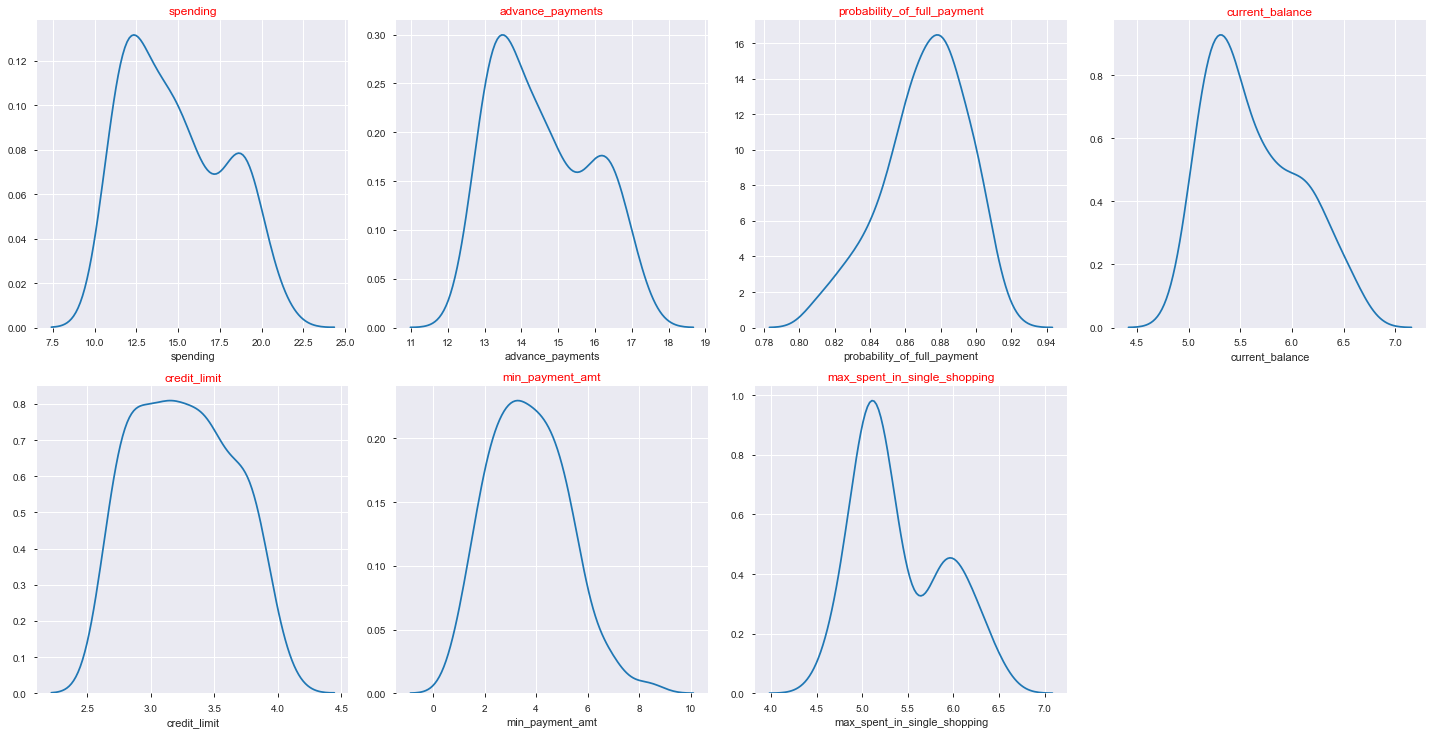

In [762]:
data_plot=df_clust
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

# Univariate Analysis

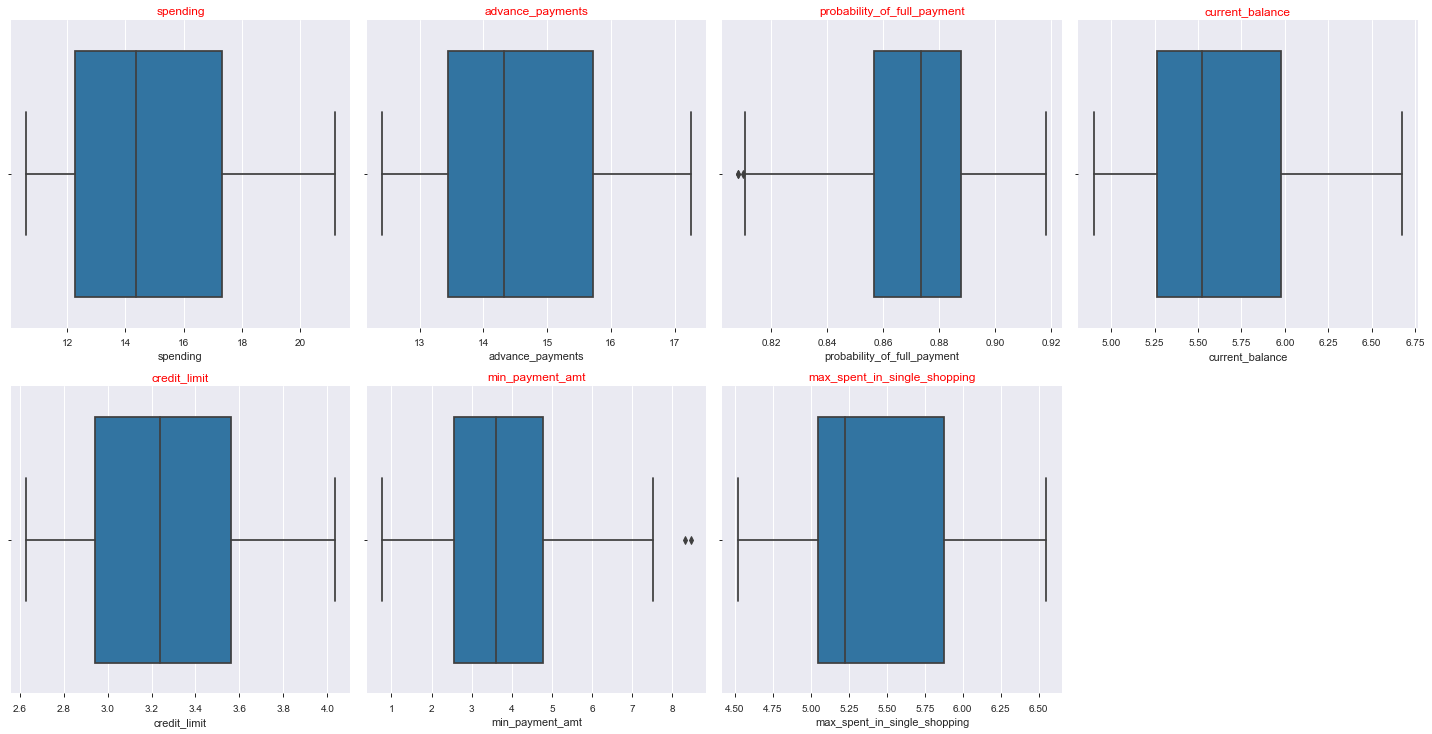

In [763]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df_clust.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(df_clust[df_clust.columns[i]])
    ax.set_title(df_clust.columns[i],color='Red')
plt.tight_layout()
plt.show()

<b>OUTLIERS in data : </b>

probability_of_full_payment 

min_payment_amt

# Checking Unique Value Counts on all columns

In [764]:
for i in df_clust.columns:
    print('Column:',i.upper())
    print(df_clust[i].value_counts(sort=True))
    
#All variables are continuous in nature

Column: SPENDING
11.23    3
15.38    3
14.11    3
17.63    2
12.19    2
        ..
14.09    1
12.72    1
13.89    1
12.36    1
18.75    1
Name: spending, Length: 193, dtype: int64
Column: ADVANCE_PAYMENTS
13.47    4
13.67    3
13.05    3
13.41    3
16.26    3
        ..
15.85    1
14.94    1
13.84    1
15.97    1
13.08    1
Name: advance_payments, Length: 170, dtype: int64
Column: PROBABILITY_OF_FULL_PAYMENT
0.8823    3
0.9077    2
0.8726    2
0.8680    2
0.8820    2
         ..
0.8964    1
0.8527    1
0.8992    1
0.8329    1
0.8750    1
Name: probability_of_full_payment, Length: 186, dtype: int64
Column: CURRENT_BALANCE
5.395    3
5.236    3
5.832    2
5.979    2
5.175    2
        ..
5.477    1
5.545    1
6.111    1
6.303    1
5.250    1
Name: current_balance, Length: 188, dtype: int64
Column: CREDIT_LIMIT
3.026    3
3.155    2
2.763    2
2.911    2
2.675    2
        ..
3.512    1
3.574    1
2.775    1
3.434    1
2.776    1
Name: credit_limit, Length: 184, dtype: int64
Column: MIN_P

# Bivariate Analysis

In [765]:
corr=df_clust.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


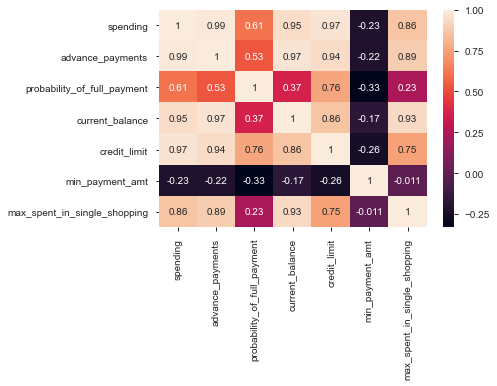

In [766]:
sns.heatmap(corr,annot=True,)

<b>From heatmap we can list below good correlations between variables.</b>
    
    
Spending and Advance Payments are having very good correlation


Spending and Current Balance are having very good  correlation

Spending and Credit Limit are having very good  correlation

Advance Payments and Current Balance are having very good  correlation

Advance Payments and Credit Limit are having very good  correlation

Current Balance and max spent in single shopping having very good correlation


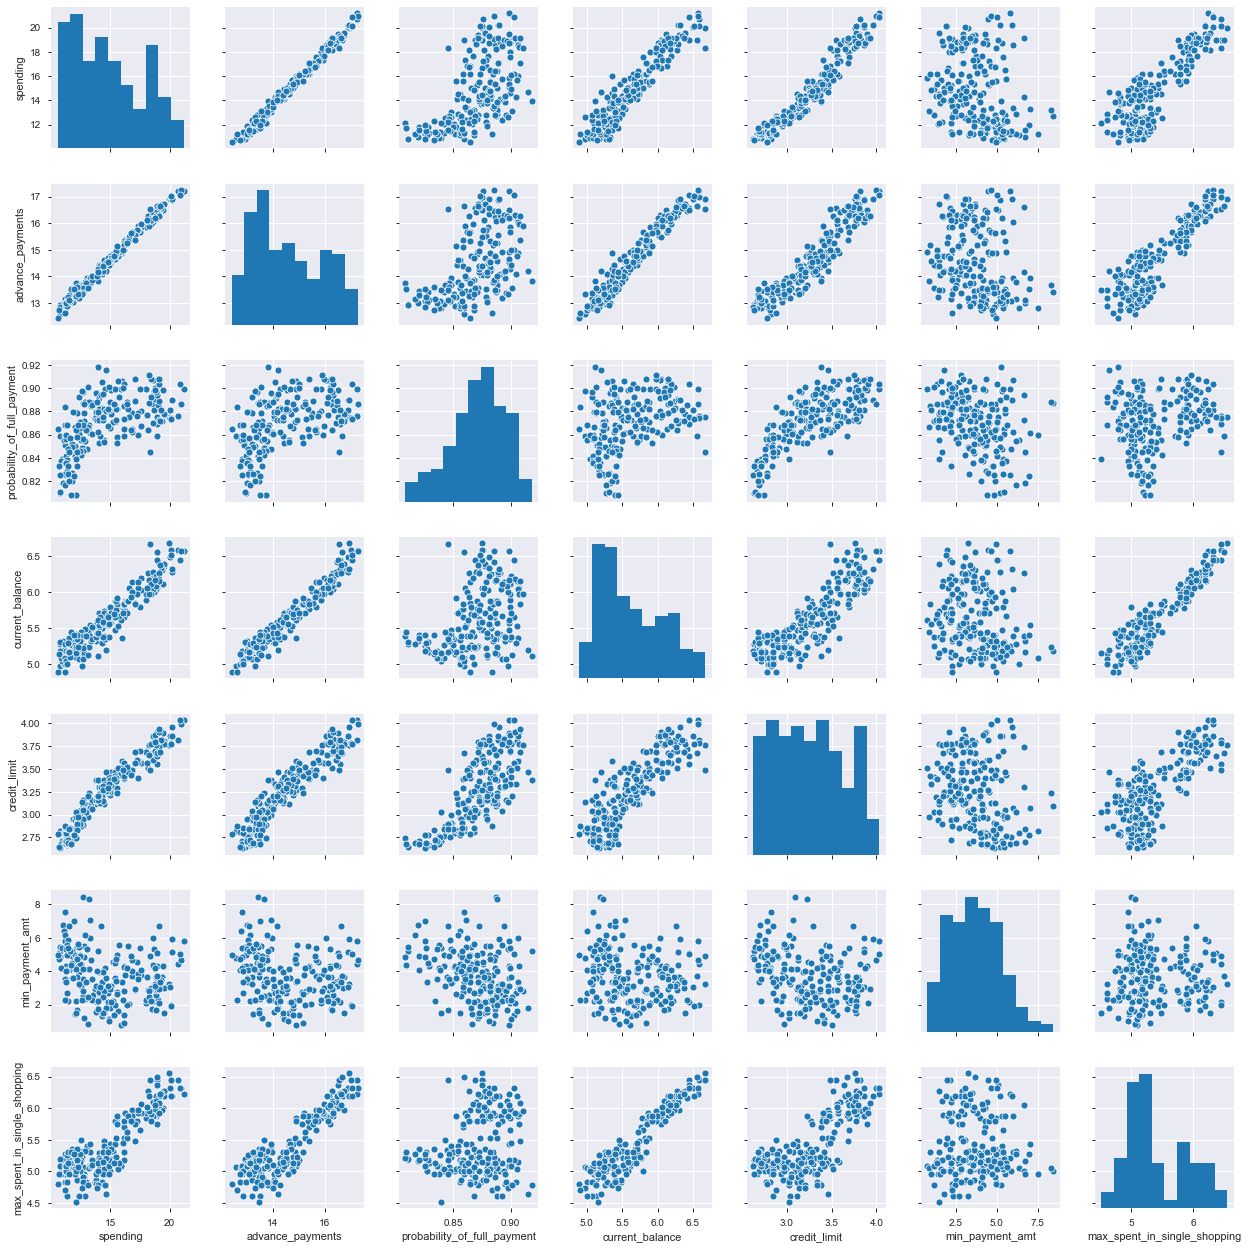

In [767]:
sns.pairplot(df_clust)

# Outlier Treatment


In [768]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [769]:
#OUTLIER Columns : probability_of_full_payment , min_payment_amt

lratio,uratio=remove_outlier(df_clust['probability_of_full_payment'])
df_clust['probability_of_full_payment']=np.where(df_clust['probability_of_full_payment']>uratio,uratio,df_clust['probability_of_full_payment'])
df_clust['probability_of_full_payment']=np.where(df_clust['probability_of_full_payment']<lratio,lratio,df_clust['probability_of_full_payment'])

lratio,uratio=remove_outlier(df_clust['min_payment_amt'])
df_clust['min_payment_amt']=np.where(df_clust['min_payment_amt']>uratio,uratio,df_clust['min_payment_amt'])
df_clust['min_payment_amt']=np.where(df_clust['min_payment_amt']<lratio,lratio,df_clust['min_payment_amt'])

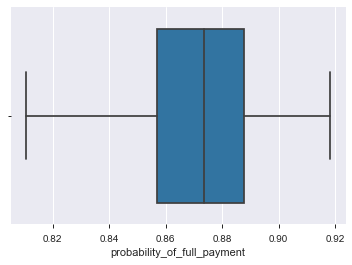

In [770]:
sns.boxplot(df_clust['probability_of_full_payment'])

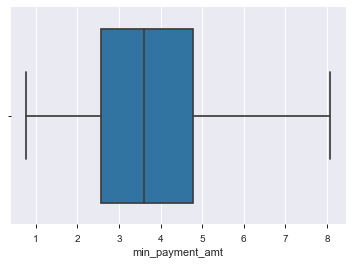

In [771]:
sns.boxplot(df_clust['min_payment_amt'])

<b> Outlier treatement has been completed. Now Data is not having any outliers</b>

# 1.2  Do you think scaling is necessary for clustering in this case? 

In [772]:
df_clust.describe()
#Description of Original Data frame

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.079625,6.550000


In [773]:
df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [774]:
df_unit=df_clust.copy()
df_unit.head()
#Coying original dataset to multiply Scaling values from data dictionary

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [775]:
#Multiplying Units from Data Dictionary
df_unit.spending=df_unit.spending*1000
df_unit.advance_payments=df_unit.advance_payments*100
df_unit.current_balance=df_unit.current_balance*1000
df_unit.credit_limit=df_unit.credit_limit*10000
df_unit.min_payment_amt=df_unit.min_payment_amt*100
df_unit.max_spent_in_single_shopping=df_unit.max_spent_in_single_shopping*1000

In [776]:
df_unit.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.875200,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.906400,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.882900,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.810588,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.899200,5890.0,36940.0,206.8,5837.0


In [777]:
SS=StandardScaler()
scaled_df1=SS.fit_transform(df_clust)

In [778]:
scaled_df_unit=SS.fit_transform(df_unit)

# Scale Data

In [779]:
scaled_df1

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [780]:
scaled_df_unit

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [781]:
scaled_df1 = pd.DataFrame(scaled_df1, index=df_clust.index, columns=df_clust.columns)
scaled_df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [782]:
scaled_df_unit = pd.DataFrame(scaled_df_unit, index=df_unit.index, columns=df_unit.columns)
scaled_df_unit.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [783]:
scaled_df1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.638372e-15,-1.358702e-16,-2.790757e-16,1.554312e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.571391e+00,-1.650501e+00,-1.668209e+00,-1.966425e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-6.009681e-01,-8.286816e-01,-8.349072e-01,-7.616981e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.031721e-01,-2.376280e-01,-5.733534e-02,-6.591519e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.126469e-01,7.945947e-01,8.044956e-01,7.185591e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.011371e+00,2.367533e+00,2.055112e+00,2.938945e+00,2.328998e+00


In [784]:
scaled_df_unit.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,1.340198e-16,7.602384e-16,1.638372e-15,-9.886272e-16,1.799486e-16,-1.321694e-17,2.955308e-16
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.571391e+00,-1.650501e+00,-1.668209e+00,-1.966425e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-6.009681e-01,-8.286816e-01,-8.349072e-01,-7.616981e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.031721e-01,-2.376280e-01,-5.733534e-02,-6.591519e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.126469e-01,7.945947e-01,8.044956e-01,7.185591e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.011371e+00,2.367533e+00,2.055112e+00,2.938945e+00,2.328998e+00


<b>Conclusion :</b>

1.As there are different units used for different columns, Data Scaling is required

2.5 point summary of data is different for all columns

3.Difference in mean and standard deviation for columns in the dataset brfore scaling

4.Multiplying units from dictionary to dataset and Scale it afterwards = Scaling done directly on the dataset

5.After Scaling , we can see STD as 1 and MEAN as 0 in Five point summary

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [785]:
#Hirarchical clustering
from scipy.cluster.hierarchy import fcluster,dendrogram,linkage


In [786]:
#Linkage  , identifying the distance 
wardlink=linkage(scaled_df1,method='ward')

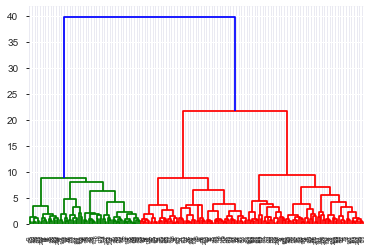

In [787]:
dend=dendrogram(wardlink)

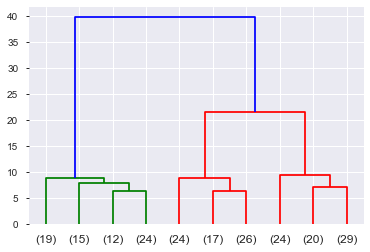

In [788]:
dend1 = dendrogram(wardlink,truncate_mode='lastp',p=10)

# Perform Hierarchical Clustering 

In [789]:
from scipy.cluster.hierarchy import fcluster

In [790]:
#Method 1 : Considering Max clustering link based on dendogram result
clust1=fcluster(wardlink,3,criterion='maxclust')
clust1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [791]:
#Method 2  , dividing near 15
clust2=fcluster(wardlink,15,criterion='distance')
clust2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [792]:
np.array_equal(clust1,clust2)

True

<b>Both clusture methods are having same results<b>

In [793]:
df_clust['H_Clust']=clust1

In [794]:
df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


# Exporting the data to CSV file

In [795]:
df_clust.to_csv('E://Clust/H_Clusters.csv')

<b> Conclusion</b>

1. Applying ward linkeage method for Hierarchical Clustering
2. By Dendrogran , considered 3 clusters for Dataset 
3. Maxclust and Distance criteria both are providing the same clustering outputs


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [796]:
from sklearn.cluster import KMeans

In [797]:
KMeans1=KMeans(n_clusters=1)
KMeans1.fit(scaled_df1)
KMeans1.inertia_

1470.0

<b> Inertia as Single cluster - 1470.0 </b>

In [798]:
wss=[]

In [799]:
#Identifying the inertia for 1-5 clusters
for i in range(1,5):
    KM=KMeans(n_clusters=i)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)   

In [800]:
wss

[1470.0, 659.1474009548498, 430.2984817512229, 370.86859623942064]

In [801]:
print(pd.DataFrame(wss,columns=["Inertia"], index=['clust1','clust2','clust3','clust4']))

            Inertia
clust1  1470.000000
clust2   659.147401
clust3   430.298482
clust4   370.868596


# WSS PLOT

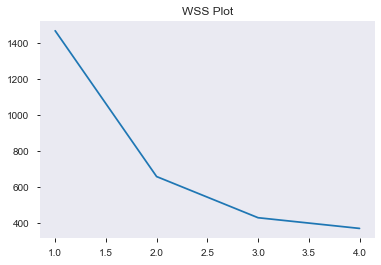

In [802]:
plt.title('WSS Plot')
plt.plot(range(1,5),wss)
plt.grid()
plt.show()

# Check for Silhoutte Score

In [803]:
KMeans2=KMeans(n_clusters=2)
KMeans2.fit(scaled_df1)
label2=KMeans2.labels_
KMeans2.inertia_

659.1474009548498

In [804]:
label2

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [805]:
KMeans3=KMeans(n_clusters=3)
KMeans3.fit(scaled_df1)
label3=KMeans3.labels_
KMeans3.inertia_

430.28354202068095

In [806]:
label3

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [807]:
KMeans4=KMeans(n_clusters=4)
KMeans4.fit(scaled_df1)
label4=KMeans4.labels_
KMeans4.inertia_

370.86859623942064

In [808]:
label4

array([3, 2, 3, 0, 3, 0, 0, 2, 3, 0, 3, 2, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0,
       3, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 2, 1, 3,
       0, 0, 2, 3, 3, 3, 0, 3, 3, 3, 3, 1, 0, 0, 0, 3, 2, 0, 0, 1, 2, 3,
       3, 2, 3, 2, 2, 0, 3, 3, 0, 3, 2, 0, 1, 2, 2, 2, 2, 3, 0, 1, 1, 1,
       1, 0, 2, 3, 2, 0, 2, 3, 3, 1, 0, 1, 2, 3, 1, 3, 2, 3, 3, 0, 2, 3,
       1, 2, 3, 0, 0, 1, 2, 2, 0, 3, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2, 0, 2,
       2, 3, 0, 3, 3, 0, 1, 2, 1, 2, 0, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 1,
       2, 2, 2, 0, 2, 1, 3, 0, 3, 1, 3, 0, 1, 2, 2, 0, 2, 0, 2, 3, 3, 3,
       2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 3, 2, 1, 3, 0,
       3, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1])

In [809]:
silhouette_score(scaled_df1,label2)

0.46560100442748986

In [810]:
silhouette_score(scaled_df1,label3)

0.40212875241666574

In [811]:
silhouette_score(scaled_df1,label4)

0.32783548276481184

In [812]:
silhouette_samples(scaled_df1,label2).min()

-0.0056773797277176906

<b>Minimum silhouette values is negative for cluster 2 </b>

In [813]:
silhouette_samples(scaled_df1,label3).min()

-0.0058847266689205325

In [814]:
silhouette_samples(scaled_df1,label4).min()

-0.05493173343527373

# Kmeans clustering we are doing for 3 clusters 

In [815]:
df_clust['K_Mean_Clust']=label3

In [816]:
df_clust.head(1)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust,K_Mean_Clust
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.55,1,0


In [817]:
sil_wid=silhouette_samples(scaled_df1,label3)

In [818]:
df_clust['sil_wid']=sil_wid

In [819]:
df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust,K_Mean_Clust,sil_wid
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0,0.576012
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2,0.359441
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0,0.640092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1,0.521022
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0,0.367214


In [820]:
df_clust.sil_wid.min()

-0.0058847266689205325

In [821]:
df_clust.to_csv('E://Clust/H_K_Clusters.csv')

<b> Conclusion</b>

1.Considering 3 clusters for K-mean clusters
2.Observed silhouette_samples for 2 Clusters is having negative records
3. Eventough there is no much fall of inertia  from 2 Clusters to 3 Clusters ,due to not coming to conclusion on only 2 clusters and also we have negative silhouette values for 2 clusters

Inertia

clust1  1470.000000

clust2   659.147401

clust3   430.298482

clust4   371.221764

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [822]:
df_clust['K_Mean_Clust_1']=df_clust.K_Mean_Clust
df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust,K_Mean_Clust,sil_wid,K_Mean_Clust_1
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0,0.576012,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2,0.359441,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0,0.640092,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1,0.521022,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0,0.367214,0


In [823]:
df_clust['K_Mean_Clust_1'].replace(to_replace=2,value=3,inplace=True)
df_clust['K_Mean_Clust_1'].replace(to_replace=1,value=2,inplace=True)
df_clust['K_Mean_Clust_1'].replace(to_replace=0,value=1,inplace=True)

In [824]:
df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust,K_Mean_Clust,sil_wid,K_Mean_Clust_1
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0,0.576012,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2,0.359441,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0,0.640092,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1,0.521022,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0,0.367214,1


In [825]:
df_clust[df_clust['H_Clust']!=df_clust['K_Mean_Clust_1']]
# There is 12 records difference between Kmean and Hierarchical Clustering 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust,K_Mean_Clust,sil_wid,K_Mean_Clust_1
18,13.22,13.84,0.8680,5.395,3.070,4.157,5.088,3,1,0.043286,2
86,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,3,0,0.229719,1
87,15.38,14.90,0.8706,5.884,3.268,4.462,5.795,1,2,-0.005885,3
100,13.37,13.78,0.8849,5.320,3.128,4.670,5.091,2,2,0.068266,3
154,11.42,12.86,0.8683,5.008,2.850,2.700,4.607,3,1,0.138810,2
166,15.50,14.86,0.8820,5.877,3.396,4.711,5.528,1,2,0.071575,3
169,11.43,13.13,0.8335,5.176,2.719,2.221,5.132,3,1,0.313615,2
177,12.21,13.47,0.8453,5.357,2.893,1.661,5.178,3,1,0.045741,2
178,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1,2,0.070700,3
186,12.11,13.47,0.8392,5.159,3.032,1.502,4.519,3,1,0.043689,2


In [826]:
df_clust.to_csv('E://Clust/H_K_Clusters_Analysis.csv')

In [827]:
df_report=pd.read_csv("H_K_Clusters_Analysis.csv")

In [828]:
df_report=df_report.drop(['Unnamed: 0','K_Mean_Clust_1','sil_wid'],axis=1)
df_report.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust,K_Mean_Clust
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2


In [829]:
HC=df_report.groupby('H_Clust')

In [830]:
KM=df_report.groupby('K_Mean_Clust')

In [831]:
HC.count()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_Mean_Clust
H_Clust,,,,,,,,
1,70,70,70,70,70,70,70,70
2,67,67,67,67,67,67,67,67
3,73,73,73,73,73,73,73,73


In [832]:
KM.count()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust
K_Mean_Clust,,,,,,,,
0,67,67,67,67,67,67,67,67
1,72,72,72,72,72,72,72,72
2,71,71,71,71,71,71,71,71


In [833]:
KM.sum()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clust
K_Mean_Clust,,,,,,,,
0,1239.19,1085.63,59.242100,413.771,247.735,243.36900,404.794,69
1,853.70,953.84,61.079763,376.686,205.167,340.84025,367.324,150
2,1025.09,1017.98,62.593400,391.535,231.405,192.22120,363.577,204


In [834]:
HC.sum()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_Mean_Clust
H_Clust,,,,,,,,
1,1286.00,1130.18,61.908000,431.072,257.924,254.74100,421.216,8
2,795.45,888.22,56.826363,351.009,190.852,331.00025,343.188,68
3,1036.53,1039.05,64.180900,399.911,235.531,190.68920,371.291,138


<b> 1.CLUSTERING </b>

<b>Cluster 0:</b> High Spending Customers with highest Current balance,Highest Advance Payments,Having highest Credit limit and highest max spent in single shopping

<b>Cluster 2:</b> Medium Spending Customers with Good Probalility of full payment than compared to other clusters, very less min payment amount.Current balance and credit limit are between cluster 0 and clsuter 1

<b>Cluster 1:</b> Less Spending Customers with less credit limit, Current balance and very good minimum payment amount and  max_spent_in_single_shopping is less compared to Medium spending customers

2.There are 12 records where clustering is not same for K-Mean and Hierarchical

3.The Number of all type of spending customers data is almost nearer to same count. Bank Marketing dataset has captured all spending type of customers


<b>Recommendations:</b>

1.Cluster 0 is More spending customers.Bank can provide Cash back offers on Single shoppping ,Increase the credit limit for them

2.As Cluster 0 is paying highest advance payments and probability of full payment is also considerable good, Bank can offer another Credit card 

3.Based on the features of Cluster 0 , Bank can suggest More spending customers to avail credit cards to thier family members and can ask them to open the Accounts for family/spouse based on loyal customers group

4.For Cluster 2 :Medium spending customers , We can give them more option on the credit limit and cash back to advance them to more spending customers. Also will have to make them to increase the balance by giving different schemes of deposit.

5.For CLuster 1: Less Spending customers , By offering good combo offer on different areas so that they can get attarcted with multiple offers

6.For CLuster 2 : Medium Spending customers are having hishest probability of full payment. Give good EMI options for them. So that the emi payments will not be for due.

7.For All customers , During festival, emergency ,special events if bank gives more benifits that will be able to increase the transaction more










#********************************************************************************************#






# Problem 2: CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

2.5 Inference: Basis on these predictions, what are the business insights and recommendations

Dataset for Problem 2: insurance_part2_data-1.csv
Attribute Information:
1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)


# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

# Importing Libraries

In [856]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [857]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report

# Read Dataset

In [858]:
df2=pd.read_csv("insurance_part2_data-2.csv")

# Profiling

In [838]:
profile2 = ProfileReport(df2, title="Pandas Profiling Report2")

In [839]:
profile2.to_widgets()

In [859]:
df2.shape

(3000, 10)

In [860]:
df2.head(4)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA


In [861]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

<b>Dataset is not having any null values</b>

In [862]:
df2[df2.duplicated()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


<b> There are 139 Duplicates in the dataset</b>

In [863]:
#df2[df2.duplicated()].to_csv('Duplicates.csv')

# Droping Duplicates

In [864]:
df2.drop_duplicates(keep='first').shape
#3000-139   --2861 

(2861, 10)

In [865]:
df2=df2.drop_duplicates(keep='first')

In [866]:
df2.shape

(2861, 10)

In [867]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
Age             2861 non-null int64
Agency_Code     2861 non-null object
Type            2861 non-null object
Claimed         2861 non-null object
Commision       2861 non-null float64
Channel         2861 non-null object
Duration        2861 non-null int64
Sales           2861 non-null float64
Product Name    2861 non-null object
Destination     2861 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


In [868]:
df2.Claimed.value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [869]:
df2.dtypes[df2.dtypes=='object']

#Below columns in the data set is having object values
#Agency_Code     object
#Type            object
#Claimed         object
#Channel         object
#Product Name    object
#Destination     object

Agency_Code     object
Type            object
Claimed         object
Channel         object
Product Name    object
Destination     object
dtype: object

In [870]:
for i in df2.columns[df2.dtypes=='object']:
    print('Column_name:',i)
    print(df2[i].value_counts())
    print(pd.Categorical(df2[i]))
    print('\n')
    
#All 6 Object columns are having Categorical Information. These Columns we will Convert to Numeric Codes

Column_name: Agency_Code
EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64
[C2B, EPX, CWT, EPX, JZI, ..., CWT, C2B, EPX, C2B, JZI]
Length: 2861
Categories (4, object): [C2B, CWT, EPX, JZI]


Column_name: Type
Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64
[Airlines, Travel Agency, Travel Agency, Travel Agency, Airlines, ..., Travel Agency, Airlines, Travel Agency, Airlines, Airlines]
Length: 2861
Categories (2, object): [Airlines, Travel Agency]


Column_name: Claimed
No     1947
Yes     914
Name: Claimed, dtype: int64
[No, No, No, No, No, ..., Yes, No, No, Yes, No]
Length: 2861
Categories (2, object): [No, Yes]


Column_name: Channel
Online     2815
Offline      46
Name: Channel, dtype: int64
[Online, Online, Online, Online, Online, ..., Online, Online, Online, Online, Online]
Length: 2861
Categories (2, object): [Offline, Online]


Column_name: Product Name
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     61

In [871]:
#Replacing Object Values with Categorical information
for i in df2.columns[df2.dtypes=='object']:
    print('Column_name:',i)
    df2[i]=pd.Categorical(df2[i]).codes

Column_name: Agency_Code
Column_name: Type
Column_name: Claimed
Column_name: Channel
Column_name: Product Name
Column_name: Destination


In [872]:
for i in list(df2[['Agency_Code','Type','Claimed','Channel','Product Name','Destination' ]]):
    print(i)
    print(df2[i].value_counts())

Agency_Code
2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64
Type
1    1709
0    1152
Name: Type, dtype: int64
Claimed
0    1947
1     914
Name: Claimed, dtype: int64
Channel
1    2815
0      46
Name: Channel, dtype: int64
Product Name
2    1071
0     645
1     615
4     421
3     109
Name: Product Name, dtype: int64
Destination
0    2327
1     319
2     215
Name: Destination, dtype: int64


In [873]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
Age             2861 non-null int64
Agency_Code     2861 non-null int8
Type            2861 non-null int8
Claimed         2861 non-null int8
Commision       2861 non-null float64
Channel         2861 non-null int8
Duration        2861 non-null int64
Sales           2861 non-null float64
Product Name    2861 non-null int8
Destination     2861 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


# Data Distribution

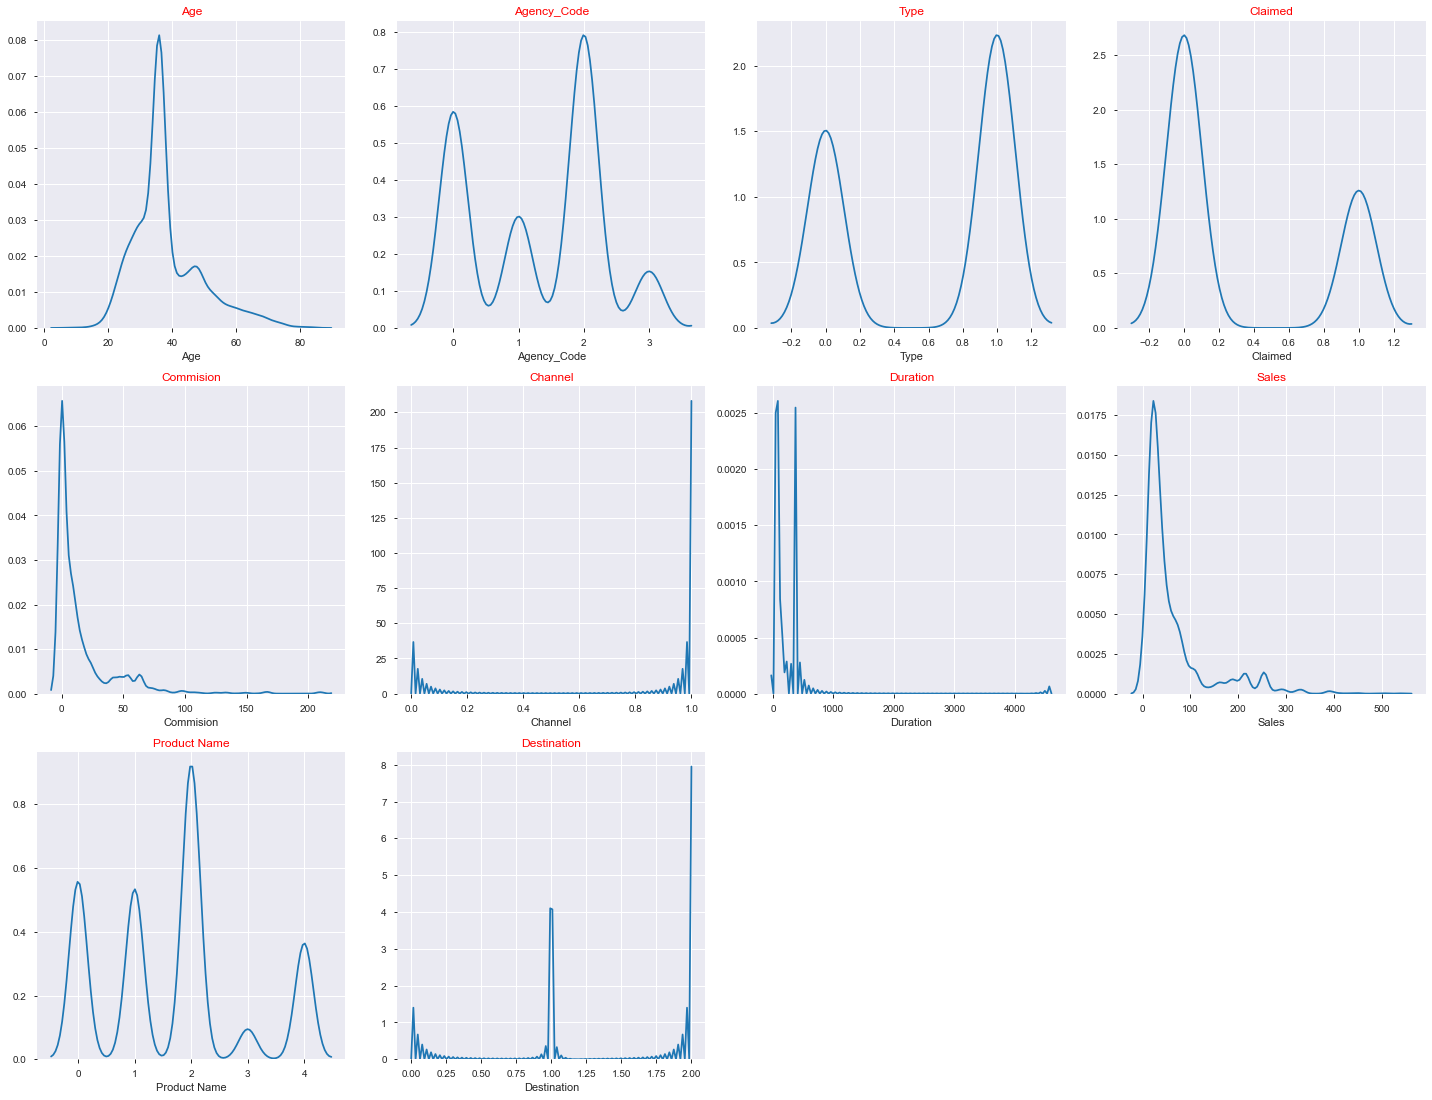

In [874]:
data_plot=df2
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

# Checking for Outliers

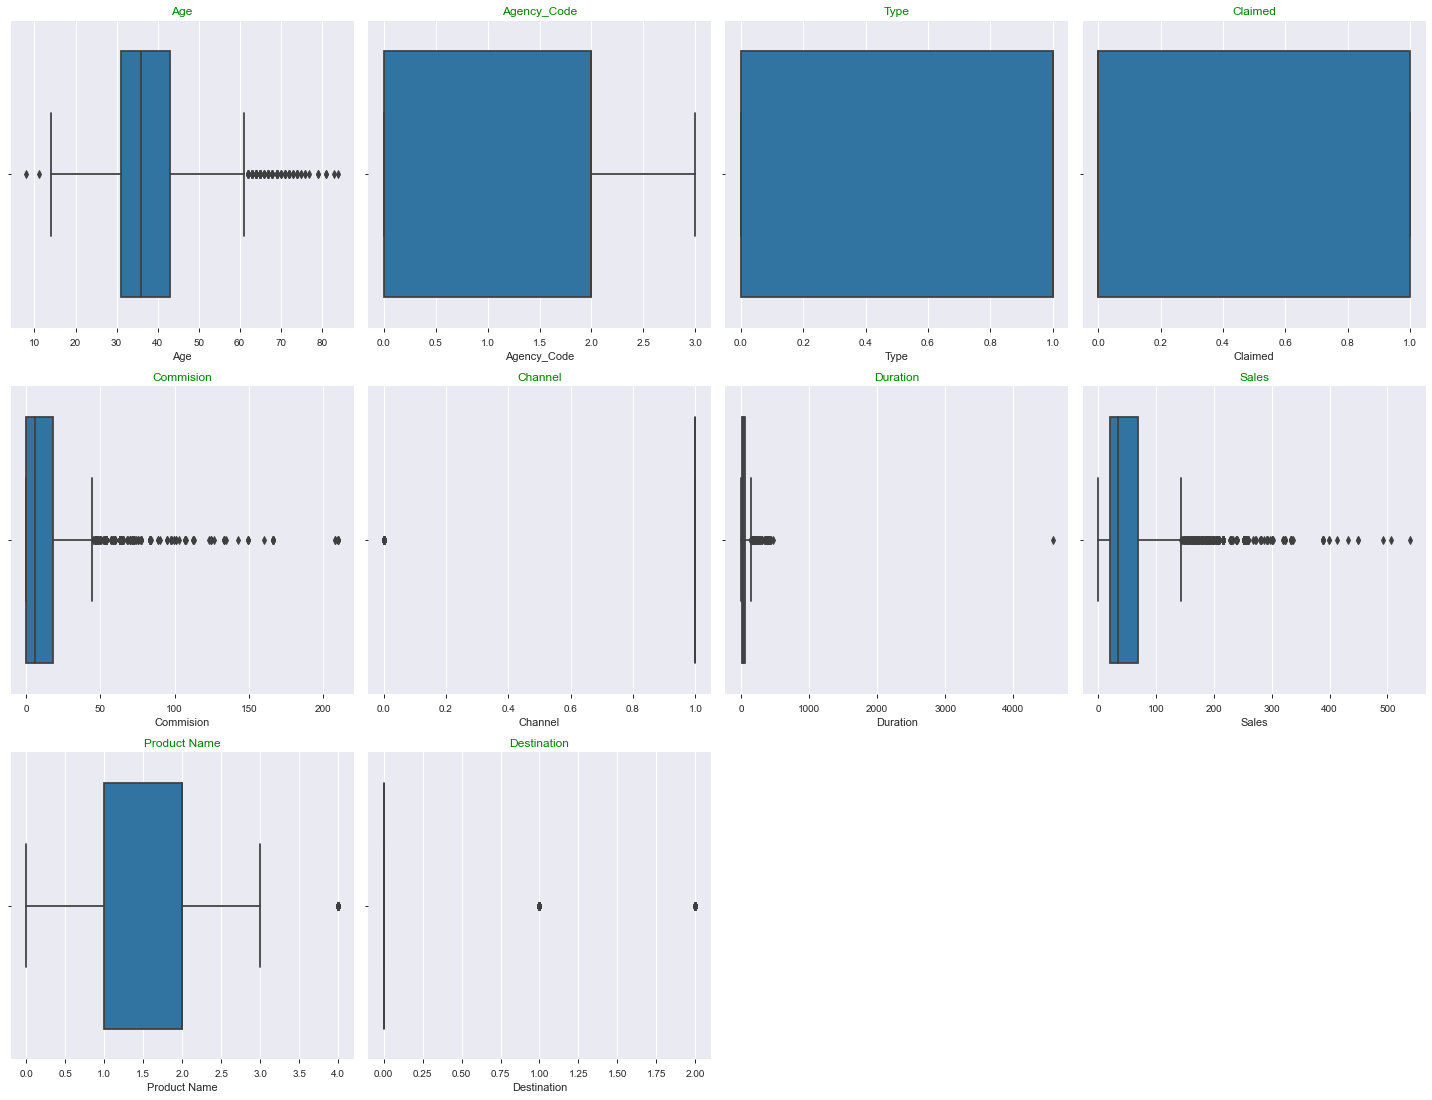

In [875]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df2.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(df2[df2.columns[i]])
    ax.set_title(df2.columns[i],color='Green')
plt.tight_layout()
plt.show()
#Outliers
#Age,Commision,Duration,Sales

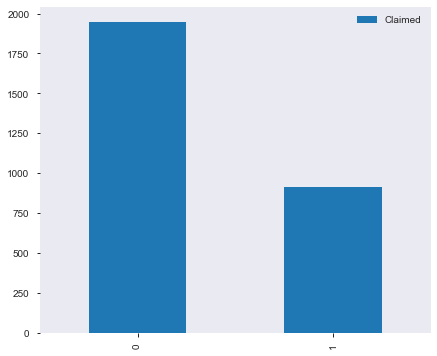

In [876]:
plt.figure(figsize=(7,6))
df2['Claimed'].value_counts().plot(kind='bar')
plt.legend()
plt.grid()
plt.show()

In [877]:
df2['Claimed'].value_counts()

0    1947
1     914
Name: Claimed, dtype: int64

In [878]:
df2['Claimed'].value_counts(normalize='True')

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

# Bivariate Analysis

In [879]:
corr=df2.corr()
corr

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000000,0.025578,-0.045517,-0.035147,0.064759,-0.067835,0.027457,0.036187,0.018982,0.000509
Agency_Code,0.025578,1.000000,0.538522,-0.415696,-0.379929,0.019136,-0.226402,-0.332392,-0.381980,0.105039
Type,-0.045517,0.538522,1.000000,-0.327056,-0.198136,-0.104953,-0.183044,-0.236585,-0.002306,0.337526
Claimed,-0.035147,-0.415696,-0.327056,1.000000,0.282892,-0.013734,0.200737,0.334581,0.255101,-0.034892
Commision,0.064759,-0.379929,-0.198136,0.282892,1.000000,0.036653,0.462114,0.762181,0.397237,0.177611
Channel,-0.067835,0.019136,-0.104953,-0.013734,0.036653,1.000000,-0.017588,0.040674,-0.037714,0.038131
Duration,0.027457,-0.226402,-0.183044,0.200737,0.462114,-0.017588,1.000000,0.549889,0.349473,-0.026677
Sales,0.036187,-0.332392,-0.236585,0.334581,0.762181,0.040674,0.549889,1.000000,0.471726,0.086495
Product Name,0.018982,-0.381980,-0.002306,0.255101,0.397237,-0.037714,0.349473,0.471726,1.000000,0.020422
Destination,0.000509,0.105039,0.337526,-0.034892,0.177611,0.038131,-0.026677,0.086495,0.020422,1.000000


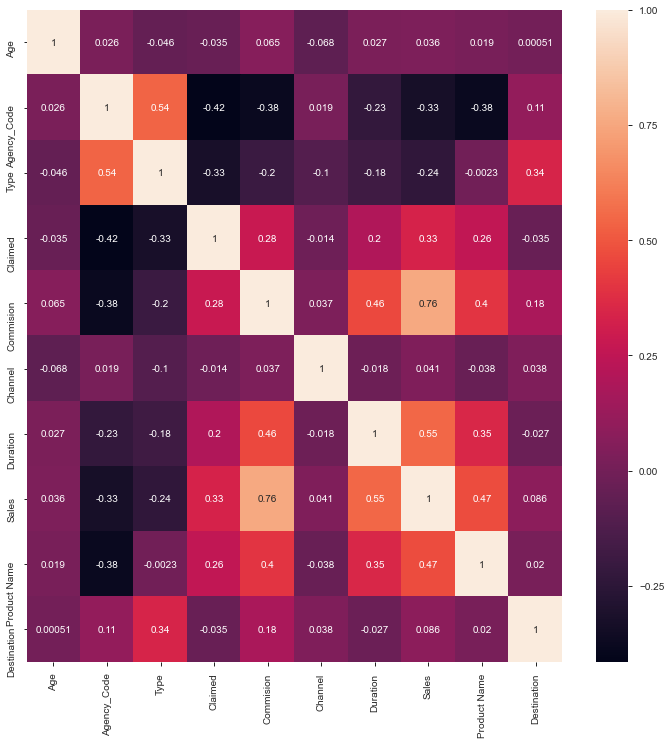

In [880]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

<b> Sales and Commision is having highest correlation</b>

<b> Sales -Duration showing very considerable correlation 



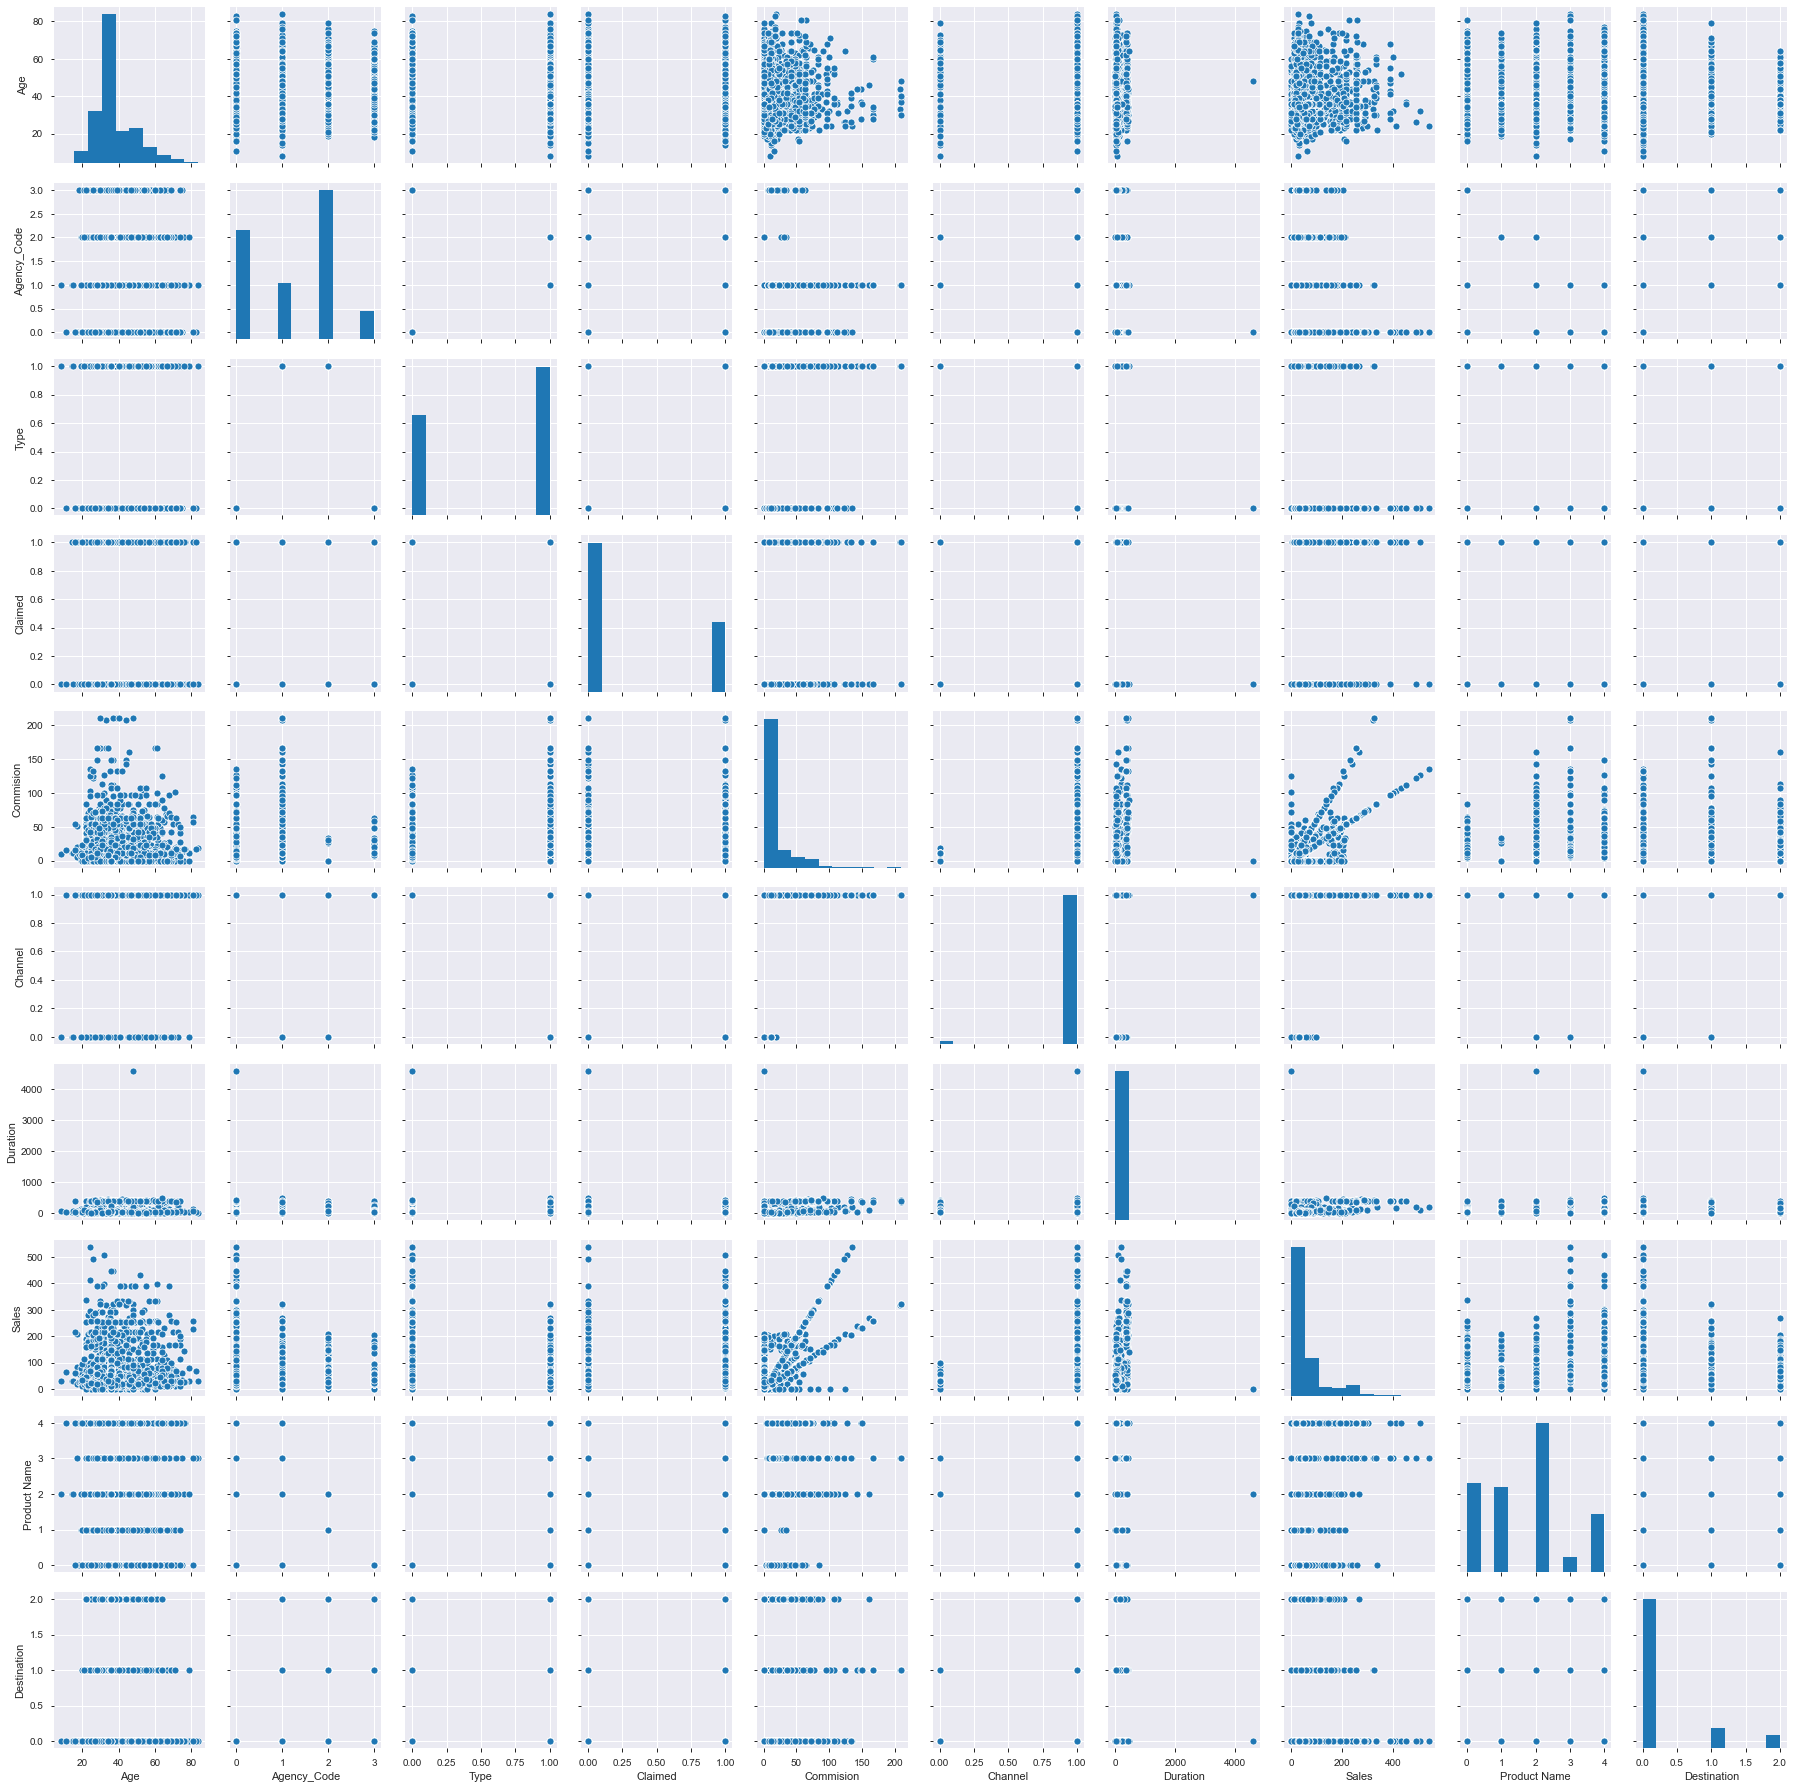

In [881]:
sns.pairplot(df2)

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

# Extracting the target column into separate vectors for training set and test set

In [882]:
X = df2.drop("Claimed", axis=1)
y = df2.pop("Claimed")

In [883]:
print(X.shape)
print(y.shape)

(2861, 9)
(2861,)


# Splitting data into training and test set

In [884]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Checking the dimensions of the training and test data

In [885]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2002, 9)
(859, 9)
(2002,)
(859,)


# Building a Decision Tree Classifier

In [886]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5],
    'min_samples_leaf': [10], 
    'min_samples_split': [20] 
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [888]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20} #cv=10  --60percent  --FINAL

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Generating Tree

In [889]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

# Variable Importance

In [890]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.508928
Sales         0.289010
Duration      0.069640
Commision     0.045872
Product Name  0.040138
Age           0.029597
Destination   0.016815
Type          0.000000
Channel       0.000000


# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

# Predicting on Training and Test dataset

In [891]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# Getting the Predicted Classes and Probs

In [892]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.210526,0.789474
1,0.971223,0.028777
2,0.818182,0.181818
3,0.837500,0.162500
4,0.837500,0.162500


# Model Evaluation

# AUC and ROC for the training data

AUC: 0.833


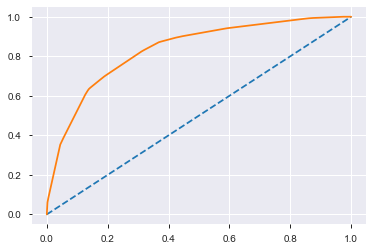

In [893]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

# AUC and ROC for the test data

AUC: 0.789


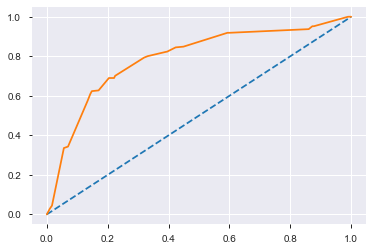

In [894]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

# Confusion Matrix for the training data

In [895]:
y_train.value_counts()

0    1359
1     643
Name: Claimed, dtype: int64

In [896]:
confusion_matrix(y_train, ytrain_predict)

array([[1176,  183],
       [ 240,  403]], dtype=int64)

In [897]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,y_train) 
cart_train_acc

0.7887112887112887

In [898]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1359
           1       0.69      0.63      0.66       643

    accuracy                           0.79      2002
   macro avg       0.76      0.75      0.75      2002
weighted avg       0.78      0.79      0.79      2002



In [899]:
cart_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.63
cart_train_f1  0.66


# Confusion Matrix for test data

In [900]:
y_test.value_counts()

0    588
1    271
Name: Claimed, dtype: int64

In [901]:
confusion_matrix(y_test, ytest_predict)

array([[504,  84],
       [106, 165]], dtype=int64)

In [902]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,y_test)
cart_test_acc

0.7788125727590222

In [903]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       588
           1       0.66      0.61      0.63       271

    accuracy                           0.78       859
   macro avg       0.74      0.73      0.74       859
weighted avg       0.77      0.78      0.78       859



In [904]:
cart_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.66
cart_test_recall  0.61
cart_test_f1  0.63


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 0.833       
    Accuracy: 0.79       
    Sensitivity: 0.63     
    Precision: 0.69       
    f1-Score: 0.66   
    
               
<b>Test Data:</b>      
    AUC: 0.789
        
   Accuracy:0.78      
    Sensitivity: 0.61    
    Precision: 0.66       
    f1-Score: 0.63  
    
Training and Test set results are almost similar, Model is having 60% sensitivity for training and testing data  

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

# Building a Random Forest Classifier

param_grid = {
    'max_depth': [5,10,20],
    'max_features': [4,5,6],
    'min_samples_leaf': [10,20],
    'min_samples_split': [20,50],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)
#FINAL
#{'max_depth': 20,'max_features': 5,'min_samples_leaf': 10,'min_samples_split': 20,'n_estimators': 300} ,cv=5

In [905]:
param_grid = {
    'max_depth': [20],
    'max_features': [5],
    'min_samples_leaf': [10],
    'min_samples_split': [20],
    'n_estimators': [300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)
#{'max_depth': 20,'max_features': 5,'min_samples_leaf': 10,'min_samples_split': 20,'n_estimators': 300} ,cv=5

In [906]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 20,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 300}

In [907]:
best_grid
#{'max_depth': 20,'max_features': 4,'min_samples_leaf': 10,'min_samples_split': 50,'n_estimators': 300} ,cv=5
#{'max_depth': 20,'max_features': 4,'min_samples_leaf': 20,'min_samples_split': 50,'n_estimators': 200} ,cv=5
#{'max_depth': 5,'max_features': 4,'min_samples_leaf': 10,'min_samples_split': 50,'n_estimators': 300} ,cv=5
#{'max_depth': 10,'max_features': 5,'min_samples_leaf': 10,'min_samples_split': 20,'n_estimators': 200} ,cv=5
#--
#{'max_depth': 20,'max_features': 5,'min_samples_leaf': 10,'min_samples_split': 50,'n_estimators': 100} ,cv=10
#{'max_depth': 10,'max_features': 5,'min_samples_leaf': 10,'min_samples_split': 20,'n_estimators': 200} ,cv=3
#{'max_depth': 20,'max_features': 5,'min_samples_leaf': 10,'min_samples_split': 20,'n_estimators': 300} ,cv=5

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

# Predicting the Training and Testing data

In [908]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# RF Model Performance Evaluation on Training data

In [909]:
confusion_matrix(y_train,ytrain_predict)

array([[1176,  183],
       [ 240,  403]], dtype=int64)

In [910]:
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.7887112887112887

In [911]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1359
           1       0.69      0.63      0.66       643

    accuracy                           0.79      2002
   macro avg       0.76      0.75      0.75      2002
weighted avg       0.78      0.79      0.79      2002



In [912]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.69
rf_train_recall  0.63
rf_train_f1  0.66


Area under Curve is 0.7460458872764599


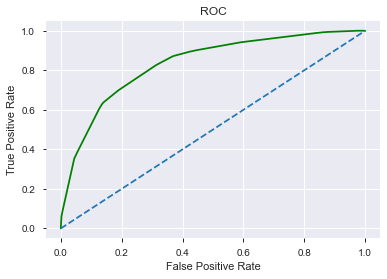

In [913]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

# RF Model Performance Evaluation on Test data

In [914]:
confusion_matrix(y_test,ytest_predict)

array([[504,  84],
       [106, 165]], dtype=int64)

In [915]:
rf_test_acc=best_grid.score(X_test,y_test)
rf_test_acc

0.7788125727590222

In [916]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       588
           1       0.66      0.61      0.63       271

    accuracy                           0.78       859
   macro avg       0.74      0.73      0.74       859
weighted avg       0.77      0.78      0.78       859



In [917]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.66
rf_test_recall  0.61
rf_test_f1  0.63


Area under Curve is 0.7329994728518714


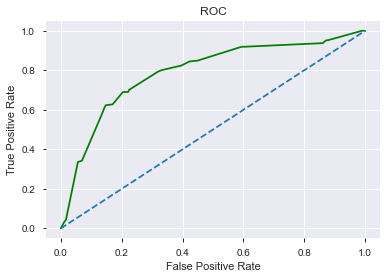

In [918]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [919]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.508928
Sales         0.289010
Duration      0.069640
Commision     0.045872
Product Name  0.040138
Age           0.029597
Destination   0.016815
Type          0.000000
Channel       0.000000


# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 0.75       
    Accuracy: 0.79        
    Sensitivity: 0.63    
    Precision: 0.69        
    f1-Score: 0.66 

            
<b>Test Data:</b>      
    AUC: 0.73     
    Accuracy: 0.78      
    Sensitivity: 0.61    
    Precision: 0.66       
    f1-Score: 0.63     
    
  
Training and Test set results are almost similar with Sensitivity and Accuracy

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

# Building a Neural Network Classifier

In [920]:
df2.describe()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,1.280671,0.597344,15.080996,0.983922,72.120238,61.757878,1.666550,0.261797
std,10.678106,1.003773,0.490518,25.826834,0.125799,135.977200,71.399740,1.277822,0.586239
min,8.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,1.000000,12.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,5.630000,1.000000,28.000000,33.500000,2.000000,0.000000
75%,43.000000,2.000000,1.000000,17.820000,1.000000,66.000000,69.300000,2.000000,0.000000
max,84.000000,3.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [921]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform (X_test)

In [922]:
#{'hidden_layer_sizes': 200, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.0001} ,cv=3 --52
#{'hidden_layer_sizes': 300, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.0001} ,cv=3 --64 --final
param_grid = {
    'hidden_layer_sizes': [300], 
    'max_iter': [5000],
    'solver': ['adam'], 
    'tol': [0.0001], 
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv =3)

In [923]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.0001}

In [924]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

# Predicting the Training and Testing data

In [925]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# NN Model Performance Evaluation on Training data

In [926]:
confusion_matrix(y_train,ytrain_predict)

array([[1139,  220],
       [ 255,  388]], dtype=int64)

In [927]:
nn_train_acc=best_grid.score(X_train,y_train) 
nn_train_acc

0.7627372627372627

In [928]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1359
           1       0.64      0.60      0.62       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [929]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.64
nn_train_recall  0.6
nn_train_f1  0.62


Area under Curve is 0.7207688619273388


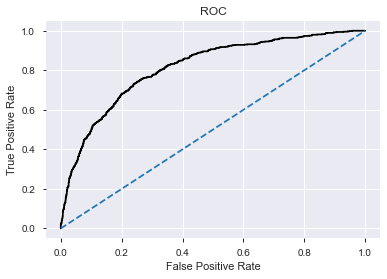

In [930]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

# NN Model Performance Evaluation on Test data

In [931]:
confusion_matrix(y_test,ytest_predict)

array([[498,  90],
       [113, 158]], dtype=int64)

In [932]:
nn_test_acc=best_grid.score(X_test,y_test)
nn_test_acc

0.7636786961583236

In [933]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       588
           1       0.64      0.58      0.61       271

    accuracy                           0.76       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.76      0.76       859



In [934]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.64
nn_test_recall  0.58
nn_test_f1  0.61


Area under Curve is 0.7149823028842532


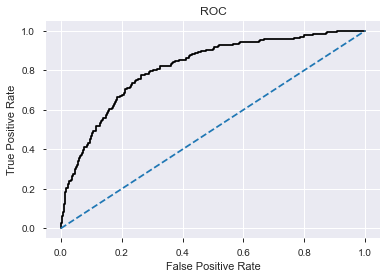

In [935]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [936]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)>

# Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 0.70      
    Accuracy: 0.77       
    Sensitivity: 0.52    
    Precision: 0.69       
    f1-Score: 0.59      
            
<b>Test Data:</b>      
    AUC: 0.69     
    Accuracy: 0.77      
    Sensitivity: 0.52   
    Precision: 0.67      
    f1-Score: 0.58    
  
Training and Test set results are almost similar, But Senisitvity is less for this model

# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

# Comparison of the performance metrics from the 3 models

In [937]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.78,0.79,0.78,0.76,0.76
AUC,0.83,0.79,0.75,0.73,0.72,0.71
Recall,0.63,0.61,0.63,0.61,0.60,0.58
Precision,0.69,0.66,0.69,0.66,0.64,0.64
F1 Score,0.66,0.63,0.66,0.63,0.62,0.61


# ROC Curve for the 3 models on the Training data

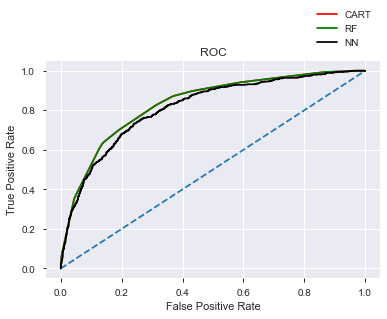

In [938]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 3 models on the Test data

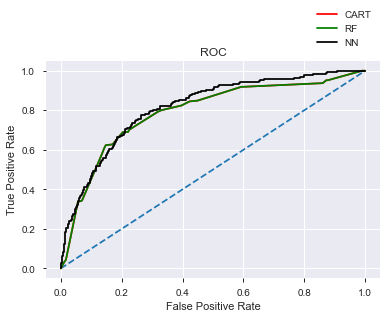

In [939]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

<b> Conclusion and Recomendation</b>

1.Out of the 3 models, Random Forest and CART has slightly better performance than Neural network model.And also CART and Random Forest have same Sesitivity

2.Overall all the 3 models are reasonaly stable enough for train and test samples with  Accurecy closer to 75% for overall  predictions. AUC is highest for CART model

3.From Cart and Random Forest Model, Agency_Code and Sales are the most significant features for taking any decisions

4.Precision for all 3 models is around 65% for these models. 

5.All 3 models are able to identify true claims only 60% data.If possible we need to collect more samples and if possible to get different features as well.

6.Based on Agency Code , Sales , Duration we are not able to predict positive claims accurately. Some more other features data to be collected
